In [1]:
#getting the data#
# The dataset is curtesy of the DeepXDE library (Lu et al.), was used in a
# tutorial similar in scope to this notebook
# https://deepxde.readthedocs.io/en/latest/demos/operator/antiderivative_aligned.html
# Download from a github repository of ETH Zurich's course on "Deep Learning in
# Scienfitic Computing"
!wget https://github.com/mroberto166/CAMLab-DLSCTutorials/raw/main/antiderivative_aligned_train.npz
!wget https://github.com/mroberto166/CAMLab-DLSCTutorials/raw/main/antiderivative_aligned_test.npz

--2024-03-30 12:49:52--  https://github.com/mroberto166/CAMLab-DLSCTutorials/raw/main/antiderivative_aligned_train.npz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mroberto166/CAMLab-DLSCTutorials/main/antiderivative_aligned_train.npz [following]
--2024-03-30 12:49:52--  https://raw.githubusercontent.com/mroberto166/CAMLab-DLSCTutorials/main/antiderivative_aligned_train.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241573 (236K) [application/octet-stream]
Saving to: ‘antiderivative_aligned_train.npz.1’

antiderivative_alig 100%[===================>] 235.91K  --.-KB/s    

# Deep O Net Example

will use the deep o network to approximate the integral operator 

$$\frac{dv}{dx} = u(x)$$
$$v(0)=0$$

$u(x)$ is the input into the network. the output is $v(x)$. i.e $$v(x) = \int u(x) dx$$ 

In [2]:
#IMPORTS
import sys
import numpy as np
import matplotlib.pyplot as plt
import torch

#importing custom files#
sys.path.append('../src/')
from model import DeepONet
from optim import train_DON

In [3]:
#loading the data#
data_train = np.load("antiderivative_aligned_train.npz",allow_pickle=True)
data_test = np.load("antiderivative_aligned_test.npz",allow_pickle=True)

In [4]:
#formatting the training data#
branch_train = data_train['X'][0]
trunk_train =data_train['X'][1] 
Y_train = data_train['y']

print(f"branch shape (n_function,n_grid_points): {branch_train.shape}")
print(f"trunk shape (n_grid_points,1): {trunk_train.shape}")
print(f"output shape (n_function,n_grid_points) : {Y_train.shape}")

branch shape (n_function,n_grid_points): (150, 100)
trunk shape (n_grid_points,1): (100, 1)
output shape (n_function,n_grid_points) : (150, 100)


In [5]:
#formatting the test data#
branch_test = data_test['X'][0]
trunk_test =data_test['X'][1] 
Y_test = data_test['y']

print(f"branch shape (n_function,n_grid_points): {branch_test.shape}")
print(f"trunk shape (n_grid_points,1): {trunk_test.shape}")
print(f"output shape (n_function,n_grid_points) : {Y_test.shape}")

branch shape (n_function,n_grid_points): (1000, 100)
trunk shape (n_grid_points,1): (100, 1)
output shape (n_function,n_grid_points) : (1000, 100)


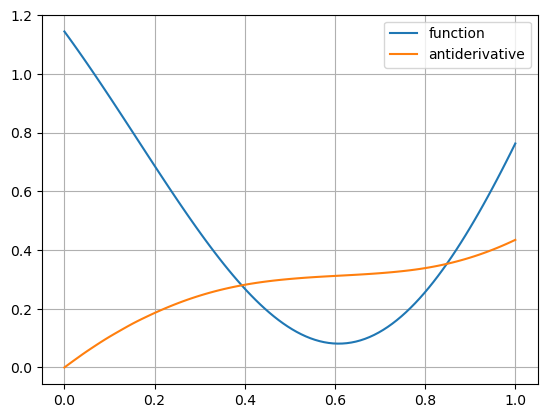

In [6]:
#plotting some of the functions#
i = 2 #function index#
xspan = trunk_train.flatten()
plt.plot(xspan,branch_train[i,:],label='function')
plt.plot(xspan,Y_train[i,:],label='antiderivative')
plt.grid()
plt.legend(loc='best')

In [7]:
#creating model#
model = DeepONet(n_branch=100,width=40,depth=1,p=40,act=torch.relu)

In [8]:
#training model#
train_DON(model,branch_train,trunk_train,Y_train,epochs=1000,log=False)

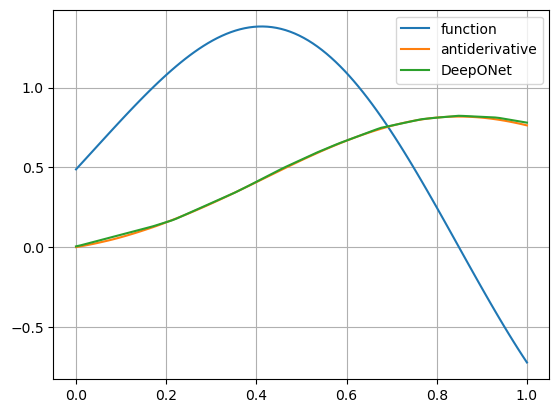

In [11]:
#validating the model#
i = 3 #function index#
xspan = trunk_test.flatten()
u = model.forward(branch_test[i,:],trunk_test).detach()
u = u.numpy().flatten()

plt.plot(xspan,branch_test[i,:],label='function')
plt.plot(xspan,Y_test[i,:],label='antiderivative')
plt.plot(xspan,u,label='DeepONet')
plt.grid()
plt.legend(loc='best')